<a href="https://colab.research.google.com/github/sowmyakovur20/machinelearninghw/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder;
from sklearn import preprocessing,tree
import seaborn as sns;
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,  f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest,  f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import graphviz
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.svm import SVC, LinearSVC
from sklearn import svm

In [ ]:
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')

**Task - 1**


**Q1. Preprocessing**

In [ ]:
list(train_df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df[['Pclass','Survived']].groupby(by =['Pclass'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex','Survived']].groupby(by =['Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
j = train_df.groupby(pd.cut(train_df['Age'], bins=20))['Survived'].value_counts()
print(j)

Age               Survived
(0.34, 4.399]     1           27
                  0           13
(4.399, 8.378]    1            9
                  0            5
(8.378, 12.357]   0           11
                  1            4
(12.357, 16.336]  0           16
                  1           15
(16.336, 20.315]  0           52
                  1           27
(20.315, 24.294]  0           62
                  1           36
(24.294, 28.273]  0           55
                  1           30
(28.273, 32.252]  0           49
                  1           35
(32.252, 36.231]  0           38
                  1           35
(36.231, 40.21]   0           28
                  1           17
(40.21, 44.189]   0           23
                  1           12
(44.189, 48.168]  0           23
                  1           12
(48.168, 52.147]  0           15
                  1           14
(52.147, 56.126]  0            9
                  1            7
(56.126, 60.105]  0            8
                

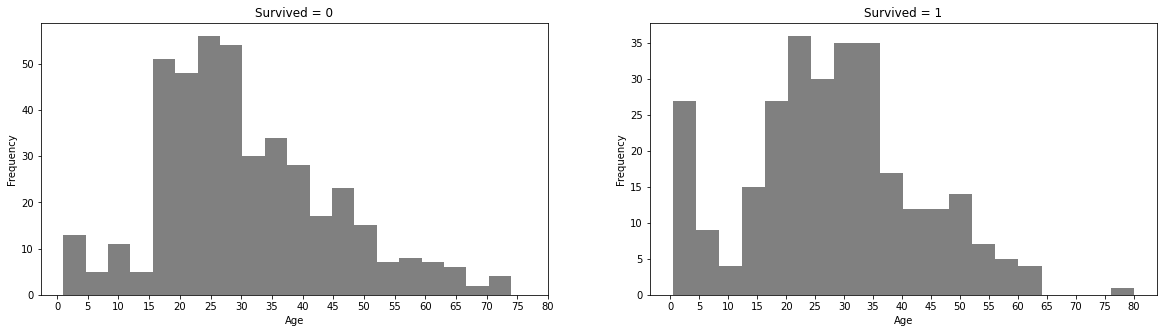

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,5))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,color='grey')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,color='grey')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

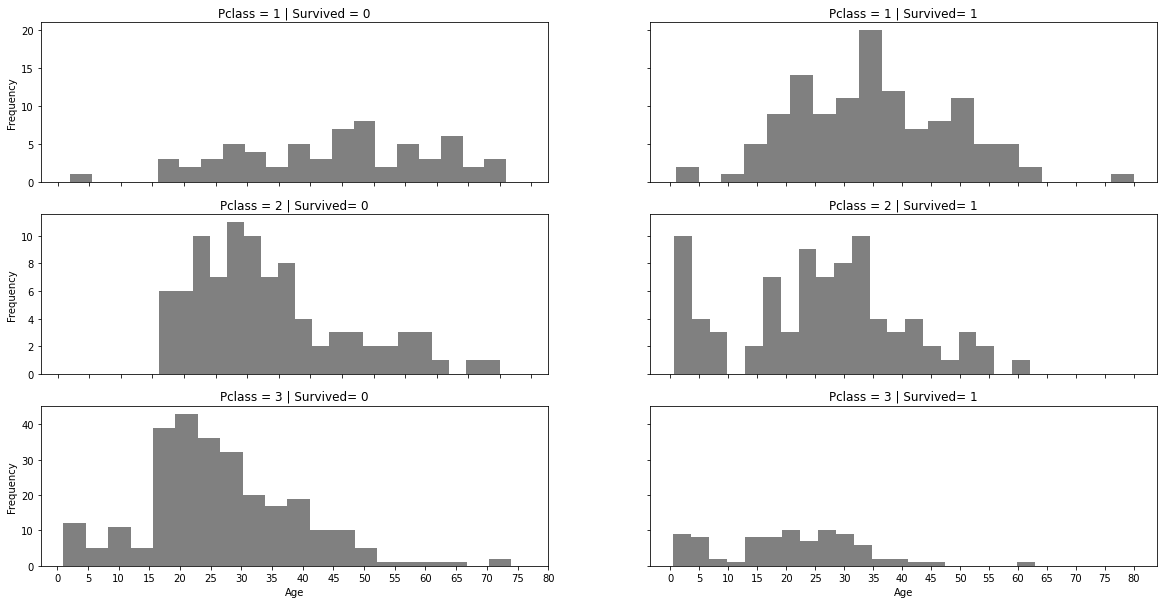

In [ ]:
f,ax=plt.subplots(3, 2, sharex='col', sharey='row',figsize=(20,10))
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 0].loc[lambda train_df: train_df.Pclass == 1]
train_df_filtered.Age.plot.hist(ax=ax[0,0],bins=20,color='grey')
ax[0,0].set_title('Pclass = 1 | Survived = 0')
ax[0,0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0,0].set_xticks(x1)
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 1].loc[lambda train_df: train_df.Pclass == 1]
train_df_filtered.Age.plot.hist(ax=ax[0,1],bins=20,color='grey')
ax[0,1].set_title('Pclass = 1 | Survived= 1')
ax[0,1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[0,1].set_xticks(x2)
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 0].loc[lambda train_df: train_df.Pclass == 2]
train_df_filtered.Age.plot.hist(ax=ax[1,0],bins=20,color='grey')
ax[1,0].set_title('Pclass = 2 | Survived= 0')
ax[1,0].set_xlabel('Age')
x3=list(range(0,85,5))
ax[1,0].set_xticks(x3)
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 1].loc[lambda train_df: train_df.Pclass == 2]
train_df_filtered.Age.plot.hist(ax=ax[1,1],bins=20,color='grey')
ax[1,1].set_title('Pclass = 2 | Survived= 1')
ax[1,1].set_xlabel('Age')
x4=list(range(0,85,5))
ax[1,1].set_xticks(x4)
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 0].loc[lambda train_df: train_df.Pclass == 3]
train_df_filtered.Age.plot.hist(ax=ax[2,0],bins=20,color='grey')
ax[2,0].set_title('Pclass = 3 | Survived= 0')
ax[2,0].set_xlabel('Age')
x5=list(range(0,85,5))
ax[2,0].set_xticks(x5)
train_df_filtered = train_df.loc[lambda train_df: train_df.Survived == 1].loc[lambda train_df: train_df.Pclass == 3]
train_df_filtered.Age.plot.hist(ax=ax[2,1],bins=20,color='grey')
ax[2,1].set_title('Pclass = 3 | Survived= 1')
ax[2,1].set_xlabel('Age')
x6=list(range(0,85,5))
ax[2,1].set_xticks(x6) 
plt.show()

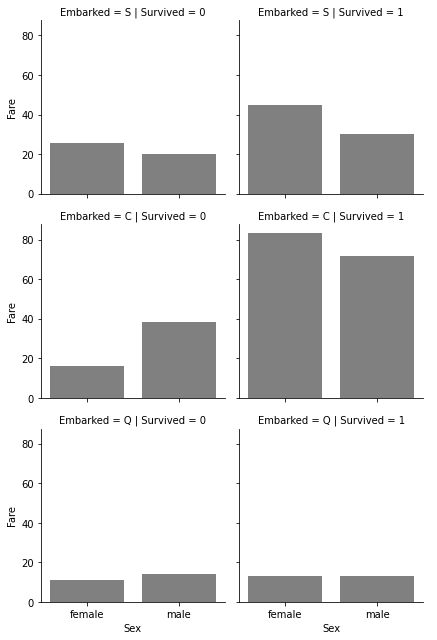

In [ ]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=3, aspect=1)
g.map(sns.barplot, 'Sex', 'Fare',  ci=None, order=['female','male'], color='grey')
g.add_legend()

In [ ]:
f = train_df['Ticket'].value_counts()
print(f)

1601         7
CA. 2343     7
347082       7
CA 2144      6
347088       6
            ..
347089       1
113050       1
W/C 14208    1
A/5 21171    1
9234         1
Name: Ticket, Length: 681, dtype: int64


In [ ]:
f = test_df['Ticket'].value_counts()
print(f)

PC 17608              5
CA. 2343              4
113503                4
C.A. 31029            3
SOTON/O.Q. 3101315    3
                     ..
248738                1
1601                  1
28666                 1
228414                1
236853                1
Name: Ticket, Length: 363, dtype: int64


In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
x=train_df['Cabin'].isnull().sum()
print('Training data- Null values of Cabin feature :',x)
y=test_df['Cabin'].isnull().sum()
print('Test data- Null values of Cabin feature :',y)
print('Train and Test data- Null values of Cabin feature :',x+y)

Training data- Null values of Cabin feature : 687
Test data- Null values of Cabin feature : 327
Train and Test data- Null values of Cabin feature : 1014


In [ ]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
both = [train_df, test_df]

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
lblen = LabelEncoder();

In [ ]:
for d in both:
    d['Sex'] = lblen.fit_transform(d['Sex'])

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


In [ ]:
mean = train_df['Age'].mean()
std = train_df['Age'].std()

print('Mean : ', mean);
print('STD : ', std);

def missing(column_val):
    if np.isnan(column_val) == True: 
        column_val = np.random.randint(std, mean, 1)[0]
    else:
         column_val = column_val
    return column_val

both[0]['Age'] = train_df['Age'].apply(missing) 
both[1]['Age'] = test_df['Age'].apply(missing) 


Mean :  29.69911764705882
STD :  14.526497332334044


In [ ]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
train_df['Embarked'].mode()[0]

'S'

In [ ]:
for c in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [ ]:
for c in test_df.columns:
    test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)

In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
def fare_ordinal(x):
    if x > -(0.001) and x <= 7.91:
        return 0
    elif x > 7.91 and x <= 14.4542:
        return 1
    elif x > 14.4542 and x <= 31.0:
        return 2
    elif x > 31.0 and x <= 512.3292:
        return 3
    
both[0]['Fare'] = train_df.Fare.apply(fare_ordinal)
both[1]['Fare'] = test_df.Fare.apply(fare_ordinal)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S


In [ ]:
train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S
5,6,0,3,"Moran, Mr. James",1,27.0,0,0,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,2,C


In [ ]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,1,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,1,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,2,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,0,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,2,S


In [ ]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
for d in both:
    d['PTitle'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
pd.crosstab(train_df['PTitle'], train_df['Sex'])

Sex,0,1
PTitle,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for d in both:
    d['PTitle'] = d['PTitle'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    d['PTitle'] = d['PTitle'].replace('Mlle', 'Miss')
    d['PTitle'] = d['PTitle'].replace('Ms', 'Miss')
    d['PTitle'] = d['PTitle'].replace('Mme', 'Mrs')
train_df[['PTitle', 'Survived']].groupby(['PTitle'], as_index=False).mean()

,PTitle,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
map_title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for d in both:
    d['PTitle'] = d['PTitle'].map(map_title)
    d['PTitle'] = d['PTitle'].fillna(0)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,PTitle
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S,1


In [ ]:
for d in both:
    d['Embarked'] = d['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
for d in both:
    d['Age'] = d['Age'].astype(int)
for d in both:
    d['Family'] = d['SibSp'] + d['Parch'] + 1
for d in both:
    d['IsAlone'] = 0
    d.loc[d['Family'] == 1, 'IsAlone'] = 1

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,PTitle,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,3,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,1,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,3,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,1,0,1,1,1


In [ ]:
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,PTitle,Family,IsAlone
0,892,3,"Kelly, Mr. James",1,34,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,0,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,1,0,3,3,0


In [ ]:
train_df['RangeofAge'] = pd.cut(train_df['Age'], 8)
train_df[['RangeofAge', 'Survived']].groupby(['RangeofAge'], as_index=False).mean().sort_values(by='RangeofAge', ascending=True)  

,RangeofAge,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.346535
2,"(20.0, 30.0]",0.341615
3,"(30.0, 40.0]",0.445161
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [ ]:
def age_ordinal(x):
    if x > -(0.08) and x <= 10.0:
        return 0
    elif x > 10.0 and x <= 20.0:
        return 1
    elif x > 20.0 and x <= 30.0:
        return 2
    elif x > 30.0 and x <= 40.0:
        return 3
    elif x > 40.0 and x <= 50.0:
        return 4
    elif x > 50.0 and x <= 60.0:
        return 5
    elif x > 60.0 and x <= 70.0:
        return 6
    elif x > 70.0 and x <= 80.0:
        return 7
    
both[0]['Age'] = train_df.Age.apply(age_ordinal)
both[1]['Age'] = test_df.Age.apply(age_ordinal)
d['Age'] = d['Age'].astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,PTitle,Family,IsAlone,RangeofAge
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,0,0,1,2,0,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,3,1,3,2,0,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,1,0,2,1,1,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,3,0,3,2,0,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,1,0,1,1,1,"(30.0, 40.0]"


In [ ]:
train_df = train_df.drop(['RangeofAge','Name','Parch', 'SibSp', 'Family'], axis=1)
both = [train_df, test_df]

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,PTitle,IsAlone
0,1,0,3,1,2,0,0,1,0
1,2,1,1,0,3,3,1,3,0
2,3,1,3,0,2,1,0,2,1
3,4,1,1,0,3,3,0,3,0
4,5,0,3,1,3,1,0,1,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,PTitle,Family,IsAlone
0,892,3,"Kelly, Mr. James",1,3,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,1,0,0,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,6,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",1,2,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,1,1,1,0,3,3,0


In [ ]:
  x_train = train_df.drop(['Survived','PassengerId',], axis=1)
x_train.shape

(891, 7)

In [ ]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,PTitle,IsAlone
0,3,1,2,0,0,1,0
1,1,0,3,3,1,3,0
2,3,0,2,1,0,2,1
3,1,0,3,3,0,3,0
4,3,1,3,1,0,1,1


In [ ]:
y_train = train_df["Survived"]
y_train.shape

(891,)

In [ ]:
x_test  = test_df.drop(['PassengerId','Name','Parch', 'SibSp', 'Family'], axis=1)
x_test.shape

(418, 7)

**Q2. Perform Feature Selection**

In [ ]:
pf=SelectKBest(score_func=f_classif,k=7).fit(x_train,y_train)

In [ ]:
pf_nscores = pd.DataFrame(pf.scores_)
pf_ncolumns = pd.DataFrame(x_train.columns)
f_scores = pd.concat([pf_ncolumns, pf_nscores],axis=1)
f_scores.columns = ['Feature_Name','Score']  
print(f_scores.nlargest(7,'Score')) 

  Feature_Name       Score
1          Sex  372.405724
5       PTitle  177.283027
0       Pclass  115.031272
3         Fare   87.509411
6      IsAlone   38.353651
4     Embarked   10.259355
2          Age    1.013618


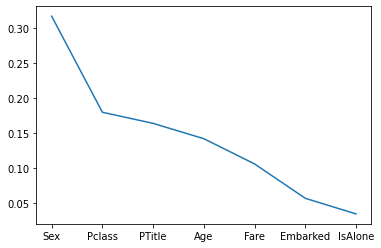

In [ ]:
m = ExtraTreesClassifier()
m.fit(x_train, y_train)
f_imp = pd.Series(m.feature_importances_, index=x_train.columns)
f_imp.nlargest(7).plot()
plt.show()

In [ ]:
train_df.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,PTitle,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.038888,-0.022998,-0.030467,0.003878,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.033747,0.299357,0.106811,0.407753,-0.203367
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.353836,-0.634271,0.045702,-0.173929,0.135207
Sex,0.042939,-0.543351,0.131900,1.000000,0.064205,-0.243613,-0.116569,-0.502713,0.303646
Age,0.038888,-0.033747,-0.353836,0.064205,1.000000,0.121288,-0.090788,-0.043617,0.120519
Fare,-0.022998,0.299357,-0.634271,-0.243613,0.121288,1.000000,-0.098161,0.339808,-0.560279
Embarked,-0.030467,0.106811,0.045702,-0.116569,-0.090788,-0.098161,1.000000,0.045400,0.017807
PTitle,0.003878,0.407753,-0.173929,-0.502713,-0.043617,0.339808,0.045400,1.000000,-0.405813
IsAlone,0.057462,-0.203367,0.135207,0.303646,0.120519,-0.560279,0.017807,-0.405813,1.000000


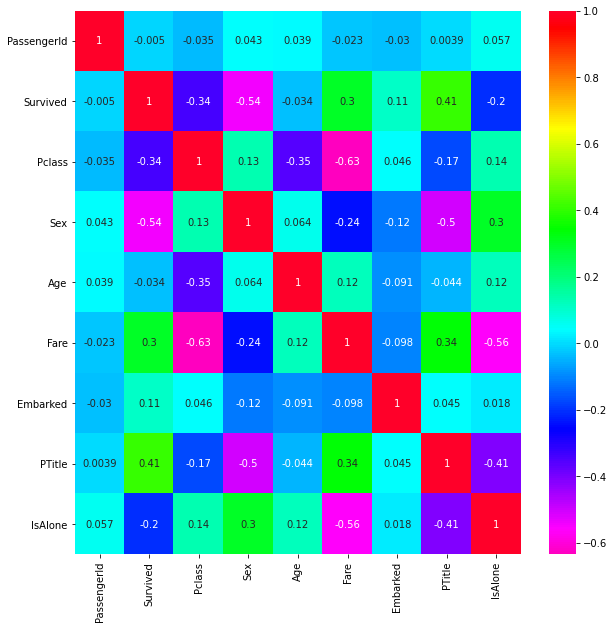

In [ ]:
corl = train_df.corr(method = 'pearson')
corl_feat = corl.index
plt.figure(figsize=(10,10))
k=sns.heatmap(train_df[corl_feat].corr(),annot=True,cmap="gist_rainbow_r")

In [ ]:
m = LogisticRegression(max_iter=1000)
r = RFE(m)
fit = r.fit(x_train, y_train)
print("Number of Features: ",fit.n_features_)
print("Features Selected: ",fit.support_)
print("Ranking of the features: ",fit.ranking_)
x_train.head()

Number of Features:  3
Features Selected:  [ True  True False False False  True False]
Ranking of the features:  [1 1 3 5 2 1 4]


,Pclass,Sex,Age,Fare,Embarked,PTitle,IsAlone
0,3,1,2,0,0,1,0
1,1,0,3,3,1,3,0
2,3,0,2,1,0,2,1
3,1,0,3,3,0,3,0
4,3,1,3,1,0,1,1


In [ ]:
x_train = x_train.drop(['Age','Embarked','IsAlone'], axis=1)
y_train = train_df["Survived"]
x_test  = x_test.drop(['Age','Embarked','IsAlone'], axis=1)
x_train.shape, y_train.shape, x_test.shape

((891, 4), (891,), (418, 4))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int64
 2   Fare    891 non-null    int64
 3   PTitle  891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [ ]:
x_test.head()

,Pclass,Sex,Fare,PTitle
0,3,1,0,1
1,3,0,0,3
2,2,1,1,1
3,3,1,1,1
4,3,0,1,3


**Q3.Gini Index**

In [ ]:
def gini(survived, total):
    rate = survived/total
    not_survived = (1 - rate)
    gini = 1 - (rate * rate) - (not_survived * not_survived)
    return gini

In [ ]:
gini_start = gini(342, 891)
gini_start

0.47301295786144276

In [ ]:
gini_s_men = gini(109, 577)
gini_s_men

0.3064437162277842

In [ ]:
gini_s_fem = gini(233, 314)
gini_s_fem

0.3828350034484158

In [ ]:
w_men = 577/891
w_female = 314/891
i = gini_start - (w_men*gini_s_men + w_female*gini_s_fem)
i

0.13964795747285236

In [ ]:
gini_mr = gini(81, 517)
gini_mr

0.2642532988637767

In [ ]:
gini_others = gini(261, 374)
gini_others

0.42170207898424317

In [ ]:
w_mr = 517/891
w_others = 374/891
inf = gini_start - (w_mr*gini_mr + w_others*gini_others)
inf

0.14267004758907526

In [ ]:
np.random.seed(42)

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=5)
d_tree.fit(x_train, y_train)
y_pr = d_tree.predict(x_test)
fi_d_tree = round(d_tree.score(x_train, y_train) * 100, 2)
print(fi_d_tree)

82.27


In [ ]:
f = pd.DataFrame(d_tree.feature_importances_, index = x_train.columns,columns=['Feature Importance'])
f.sort_values(by='Feature Importance', ascending=False).head(10)

,Feature Importance
PTitle,0.702010
Pclass,0.213687
Fare,0.076276
Sex,0.008026


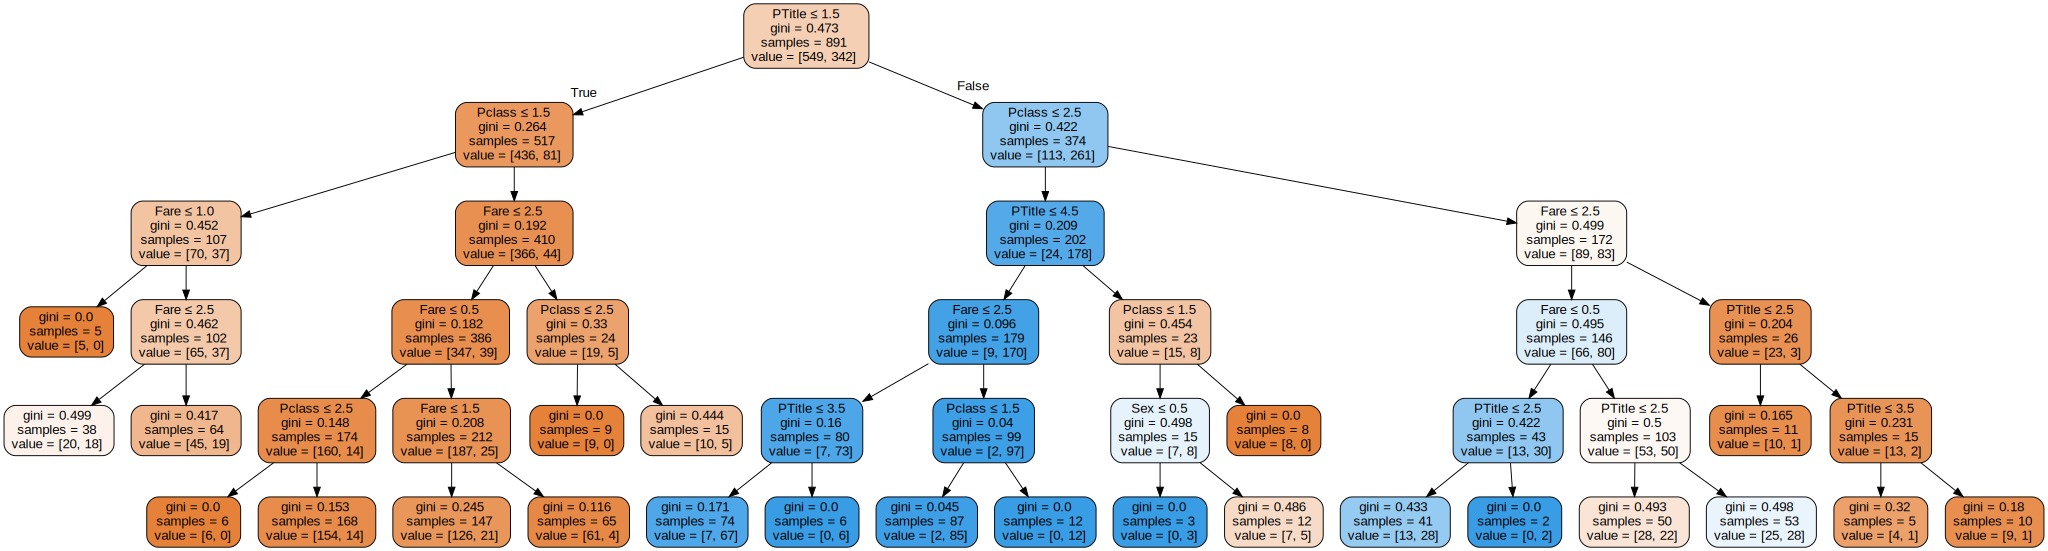

In [ ]:
d = tree.export_graphviz(d_tree, out_file=None,filled=True, rounded=True,special_characters=True,feature_names = x_train.columns) 
flow = graphviz.Source(d)
flow

**Q4. Five-Fold Cross Validation**

In [ ]:
five_fold_val = round(np.mean(cross_val_score(d_tree, x_train, y_train,cv=5)) * 100, 2)
five_fold_val

79.57

In [ ]:
np.random.seed(42)
r_f = RandomForestClassifier(n_estimators=100)
r_f.fit(x_train, y_train)
y_pred = r_f.predict(x_test)
r_f.score(x_train, y_train)
a_r_f = round(r_f.score(x_train, y_train) * 100, 2)
a_r_f

82.49

In [ ]:
five_val = np.mean(cross_val_score(r_f, x_train, y_train, cv=5))
five_val = round(five_val * 100, 2)
five_val

79.68

In [ ]:
m = pd.DataFrame({
    'Models': ['Random Forest','Decision Tree'],
    'Scores': [ a_r_f, fi_d_tree]})
m.sort_values(by='Scores', ascending=False)

,Models,Scores
0,Random Forest,82.49
1,Decision Tree,82.27


**Assignment 3**

In [ ]:
linear = svm.SVC(kernel='linear')
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
accuracy = round(np.mean(cross_val_score(linear, x_train, y_train, cv=10, scoring="accuracy"))* 100, 2)
accuracy

78.67

In [ ]:
poly = svm.SVC(kernel='poly', degree = 2)
poly.fit(x_train, y_train)
Y_pred = poly.predict(x_test)
accuracy = round(np.mean(cross_val_score(poly, x_train, y_train, cv=10, scoring="accuracy"))* 100, 2)
accuracy

79.01

In [ ]:
rbf = svm.SVC(kernel='rbf')
rbf.fit(x_train, y_train)
Y_pred = rbf.predict(x_test)
accuracy = round(np.mean(cross_val_score(rbf, x_train, y_train, cv=10, scoring="accuracy"))* 100, 2)
accuracy

81.03

In [ ]:
def grid_best():
    #list of parameters
    C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    kernels = ['linear', 'rbf']
    
    #variables to store the results
    best_score = 0
    best_C = None
    best_gamma = None
    best_kernel = None
    
    for C in C_values:
        for gamma in gamma_values:
            for kernel in kernels:
                svc = svm.SVC(C=C, gamma=gamma, kernel=kernel)
                svc.fit(x_train, y_train)
                score = np.mean(cross_val_score(svc, x_train, y_train, cv=10, scoring="accuracy"))
                
                if score > best_score:
                    best_score = score
                    best_C = C
                    best_gamma = gamma
                    best_kernel = kernel
                    
    print('Highest {0:.4%} accuracy'.format(best_score))
    print('C = {0}\ngamma = {1}\nKernel = {2}'.format(best_C, best_gamma, best_kernel))
    
    return best_C, best_gamma, best_kernel

In [ ]:
C, gamma, kernel = grid_best()

Highest 81.3683% accuracy
C = 30
gamma = 0.03
Kernel = rbf
